In [1]:
# Random Forest with model based feature selection

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
train_data = pd.read_csv(r"C:\Users\Brad\OneDrive - Ashesi University\Desktop\Ashesi University\Senior Year Sem 2\Capstone 2\Data\fs_train_data_2.csv")

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [5]:
train_data["land_surface_condition"] = encoder.fit_transform(train_data["land_surface_condition"])
train_data["foundation_type"] = encoder.fit_transform(train_data["foundation_type"])
train_data["roof_type"] = encoder.fit_transform(train_data["roof_type"])
train_data["ground_floor_type"] = encoder.fit_transform(train_data["ground_floor_type"])
train_data["other_floor_type"] = encoder.fit_transform(train_data["other_floor_type"])
train_data["position"] = encoder.fit_transform(train_data["position"])
train_data["plan_configuration"] = encoder.fit_transform(train_data["plan_configuration"])

In [6]:
train_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,count_families,has_secondary_use,damage_grade
0,30,266,1224,1,25,5,2,2,2,0,...,0,1,0,0,0,0,0,0,0,2
1,17,409,12182,2,0,13,7,2,2,0,...,0,1,0,0,0,0,0,1,0,3
2,17,716,7056,2,5,12,6,1,2,1,...,0,1,0,0,0,0,0,1,0,3
3,4,651,105,2,80,5,4,0,2,0,...,0,1,0,0,0,0,0,1,0,2
4,3,1387,3909,5,40,5,10,2,2,0,...,0,0,0,1,0,0,0,1,0,2


In [7]:
x = train_data.iloc[:, :-1].values
y = train_data.iloc[:,23].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [9]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           1       0.64      0.49      0.55      5027
           2       0.73      0.82      0.77     29612
           3       0.72      0.61      0.66     17482

    accuracy                           0.72     52121
   macro avg       0.69      0.64      0.66     52121
weighted avg       0.72      0.72      0.71     52121



In [12]:
#Model based Feature Selection

from sklearn.feature_selection import SelectFromModel
fs = SelectFromModel(classifier, threshold='median')
fs.fit(X_train,y_train)
fs_features = fs.transform(X_train)

In [13]:
# Print the indices of the selected features
print(fs.get_support(indices=True))

[ 0  1  2  4  5  6  7  8  9 11 12 21]


In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

axis_tick_labels = ['Grade 1', 'Grade 2', 'Grade 3']


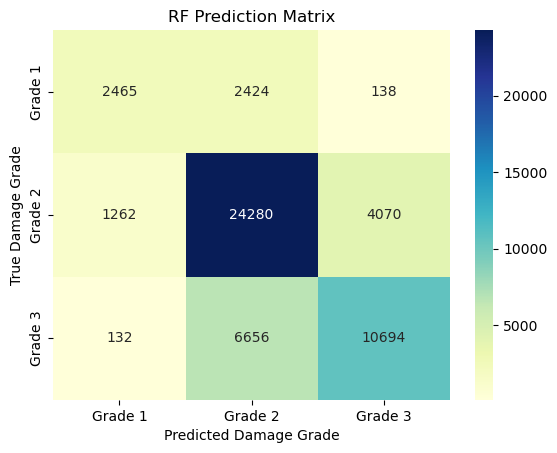

In [15]:
# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d", xticklabels=axis_tick_labels, yticklabels=axis_tick_labels)
plt.title("RF Prediction Matrix")
plt.xlabel("Predicted Damage Grade")
plt.ylabel("True Damage Grade")
plt.show()

In [16]:
from sklearn.tree import export_text

In [17]:
features_data = train_data.drop(columns=['damage_grade'], axis=1)

In [18]:
# # Print out the decision trees in the random forest
# for i, tree in enumerate(classifier.estimators_):
#     r = export_text(tree, feature_names=features_data.columns.tolist())
#     print(f"Decision Tree {i}:\n{r}")

# tree = classifier.estimators_[0]
# r = export_text(tree, feature_names=features_data.columns.tolist())
# print(f"Decision Tree {0}:\n{r}")